In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge

In [6]:
# rename class RidgeRegression so that it is not confused with the sklearn LinearRegression class
class RidgeRegression(LinearRegression):
    """ 
    Ridge Regression
    
    
    Parameters
    ----------
    
    alpha: Regularization strength
        
    Attributes
    ----------
    m : scalar
        Estimated slope for the linear regression problem.
    
    b : ?
        ????????
        
    See Also
    --------
    sklearn.linear_model.Lasso : The Lasso is a linear model that estimates
        sparse coefficients with l1 regularization.
    sklearn.linear_model.ElasticNet : Elastic-Net is a linear regression
        model trained with both l1 and l2 -norm regularization of the
        coefficients.
        
    Examples
    --------
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> import pandas as pd

    >>> from sklearn.linear_model import LinearRegression, Ridge
    >>> mdl = RidgeRegression(alpha=0.05)
    >>> mdl.fit(X_train, y_train)
    >>> ax.plot(X_test, mdl.predict(X_test))
    v1.0
    
    """
    
    def __init__(self,alpha,fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.alpha=alpha
    
    def fit(self,x,y):
        
        a,b=x.shape
        I=np.identity(b)
        
        self.m=np.divide(np.dot(x.T,y),(np.dot(x.T,x)+self.alpha*I))
        
        if self.fit_intercept:
            b_opt = np.mean(y) - self.m * np.mean(x)
            self.b = b_opt
            
    def predict(self,x):
        return self.__linear_model(x)
    
    def __linear_model(self,x_data):
        if self.fit_intercept:
            y_pred = self.m*x_data + self.b
        else:
            y_pred = self.m*x_data
        return y_pred

    def score(self,x,y):
        """ 1- Residual sum of squares plus penalty term divided by total sum of squares """
        ss_res = np.sum((y - self.predict(x))**2+self.alpha*self.m**2) # residual sum of squares
        ss_tot = np.sum((y - np.mean(y))**2) # total sum of squares

        r2 = 1-ss_res/ss_tot
        
        return r2

Automatically created module for IPython interactive environment


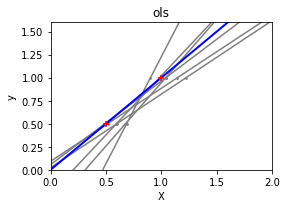

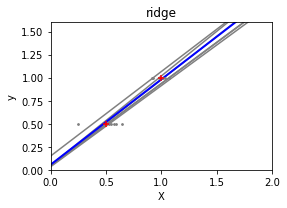

In [26]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge

this_X=0
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=LinearRegression(),
                   ridge=RidgeRegression(alpha=0.1)) # <<<<<<<< YOUR MODEL HERE

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()